In [1]:
library(readxl)
library(dplyr)
library(tidyr)



Anexando pacote: ‘dplyr’


Os seguintes objetos são mascarados por ‘package:stats’:

    filter, lag


Os seguintes objetos são mascarados por ‘package:base’:

    intersect, setdiff, setequal, union




# N=100

In [24]:
file_names <- c("BCF(no_pi_hat)_N100.xlsx", "BCF(pi_hat)_N100.xlsx", "BCF(pi_oracle)_N100.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_N100.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_N100.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.1332 +/- 0.0808 0.1327 +/- 0.0739 0.1291 +/- 0.0765
2    CATE_MAE 0.1240 +/- 0.0830 0.1233 +/- 0.0763 0.1200 +/- 0.0787
3   CATE_MAPE 1.3213 +/- 0.9484 1.2915 +/- 0.8705 1.2564 +/- 0.8746
4  CATE_cover 0.9991 +/- 0.0081 0.9996 +/- 0.0040 0.9985 +/- 0.0122
5    CATE_len 0.9137 +/- 0.1785 0.9699 +/- 0.1649 0.8638 +/- 0.1708
6    ATE_RMSE 0.1187 +/- 0.0876 0.1178 +/- 0.0814 0.1148 +/- 0.0834
7     ATE_MAE 0.1187 +/- 0.0876 0.1178 +/- 0.0814 0.1148 +/- 0.0834
8    ATE_MAPE 0.9475 +/- 0.6960 0.9411 +/- 0.6497 0.9166 +/- 0.6649
9   ATE_cover 1.0000 +/- 0.0000 1.0000 +/- 0.0000 1.0000 +/- 0.0000
10    ATE_len 0.7380 +/- 0.1559 0.7981 +/- 0.1507 0.7178 +/- 0.1556
11    pi_RMSE 0.4382 +/- 0.0016 0.0538 +/- 0.0124 0.0000 +/- 0.0000
12     pi_MAE 0.4379 +/- 0.0017 0.0439 +/- 0.0091 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = 0.047

# N=500

In [25]:
file_names <- c("BCF(no_pi_hat)_N500.xlsx", "BCF(pi_hat)_N500.xlsx", "BCF(pi_oracle)_N500.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_N500.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_N500.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.0961 +/- 0.0455 0.1043 +/- 0.0409 0.0953 +/- 0.0428
2    CATE_MAE 0.0838 +/- 0.0450 0.0924 +/- 0.0412 0.0840 +/- 0.0429
3   CATE_MAPE 0.8758 +/- 0.5096 0.8953 +/- 0.4121 0.8484 +/- 0.4791
4  CATE_cover 0.9762 +/- 0.0906 0.9737 +/- 0.0936 0.9724 +/- 0.0969
5    CATE_len 0.5247 +/- 0.0978 0.5399 +/- 0.0964 0.4890 +/- 0.0823
6    ATE_RMSE 0.0722 +/- 0.0521 0.0829 +/- 0.0494 0.0748 +/- 0.0497
7     ATE_MAE 0.0722 +/- 0.0521 0.0829 +/- 0.0494 0.0748 +/- 0.0497
8    ATE_MAPE 0.5777 +/- 0.4162 0.6629 +/- 0.3940 0.5981 +/- 0.3968
9   ATE_cover 0.9500 +/- 0.2190 0.9200 +/- 0.2727 0.9600 +/- 0.1969
10    ATE_len 0.3357 +/- 0.0442 0.3533 +/- 0.0447 0.3269 +/- 0.0414
11    pi_RMSE 0.4382 +/- 0.0007 0.0397 +/- 0.0055 0.0000 +/- 0.0000
12     pi_MAE 0.4379 +/- 0.0008 0.0320 +/- 0.0042 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = -1.33

# N=1000

In [26]:
file_names <- c("BCF(no_pi_hat)_N1000.xlsx", "BCF(pi_hat)_N1000.xlsx", "BCF(pi_oracle)_N1000.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_N1000.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_N1000.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.0837 +/- 0.0304 0.0943 +/- 0.0338 0.0829 +/- 0.0279
2    CATE_MAE 0.0715 +/- 0.0295 0.0820 +/- 0.0331 0.0713 +/- 0.0273
3   CATE_MAPE 0.7242 +/- 0.2899 0.7745 +/- 0.3136 0.7118 +/- 0.2739
4  CATE_cover 0.9689 +/- 0.0841 0.9499 +/- 0.1128 0.9716 +/- 0.0737
5    CATE_len 0.4274 +/- 0.0834 0.4316 +/- 0.0901 0.4098 +/- 0.0761
6    ATE_RMSE 0.0583 +/- 0.0379 0.0696 +/- 0.0424 0.0611 +/- 0.0344
7     ATE_MAE 0.0583 +/- 0.0379 0.0696 +/- 0.0424 0.0611 +/- 0.0344
8    ATE_MAPE 0.4669 +/- 0.3045 0.5570 +/- 0.3394 0.4892 +/- 0.2759
9   ATE_cover 0.9100 +/- 0.2876 0.8500 +/- 0.3589 0.9200 +/- 0.2727
10    ATE_len 0.2476 +/- 0.0275 0.2524 +/- 0.0288 0.2460 +/- 0.0278
11    pi_RMSE 0.4382 +/- 0.0005 0.0346 +/- 0.0036 0.0000 +/- 0.0000
12     pi_MAE 0.4379 +/- 0.0005 0.0279 +/- 0.0030 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = -2.31

# N=10000

In [27]:
file_names <- c("BCF(no_pi_hat)_N10000.xlsx", "BCF(pi_hat)_N10000.xlsx", "BCF(pi_oracle)_N10000.xlsx")
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len", "pi_RMSE", "pi_MAE")


# Function to read data and calculate summary statistics
read_and_summarize <- function(file_name, model_name) {
  df <- read_excel(file_name)
  means <- df %>% summarise(across(all_of(metrics), mean)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "mean") %>%
    mutate(model = model_name)
  sds <- df %>% summarise(across(all_of(metrics), sd)) %>%
    pivot_longer(cols = everything(), names_to = "metric", values_to = "sd") %>%
    mutate(model = model_name)
  return(list(means = means, sds = sds))
}

# Apply the function to each file
summary_stats_list <- lapply(1:length(file_names), function(i) read_and_summarize(file_names[i], model_names[i]))

# Combine means into a single data frame
mean_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$means))

# Pivot the means data frame to the desired wide format
mean_table <- mean_df_long %>%
  pivot_wider(names_from = metric, values_from = mean) %>%
  select(Model = model, all_of(metrics))

# Combine standard deviations into a single data frame
sd_df_long <- bind_rows(lapply(summary_stats_list, function(x) x$sds))

# Pivot the standard deviations data frame to the desired wide format
sd_table <- sd_df_long %>%
  pivot_wider(names_from = metric, values_from = sd) %>%
  select(Model = model, all_of(metrics))

# Create a table with mean +/- standard deviation
mean_sd_table <- data.frame(Metric = metrics)
for (i in 1:length(model_names)) {
  mean_values <- mean_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  sd_values <- sd_table %>% filter(Model == model_names[i]) %>% select(-Model) %>% unlist()
  mean_sd_table[[model_names[i]]] <- paste0(sprintf("%.4f", mean_values), " +/- ", sprintf("%.4f", sd_values))
}

# Print the tables
cat("Table with Mean +/- Standard Deviation:\n")
print(mean_sd_table)


# Perform Welch's t-tests between BCF(no_pi_hat) and BCF(pi_hat)
cat("\nWelch's t-test between BCF(no_pi_hat) and BCF(pi_hat):\n")

df_no_pi_hat <- read_excel("BCF(no_pi_hat)_N10000.xlsx")
df_pi_hat <- read_excel("BCF(pi_hat)_N10000.xlsx")

metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "pi_RMSE", "pi_MAE")

for (metric in metrics) {
  test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
  cat(sprintf("%s: t = %.4f, df = %.2f, p-value = %.4f\n",
              metric, test_result$statistic, test_result$parameter, test_result$p.value))
  if (test_result$p.value < 0.05) {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is statistically significant.\n", metric))
  } else {
    cat(sprintf("The difference in %s between BCF(no_pi_hat) and BCF(pi_hat) is not statistically significant.\n", metric))
  }
}

Table with Mean +/- Standard Deviation:
       Metric    BCF(no_pi_hat)       BCF(pi_hat)    BCF(pi_oracle)
1   CATE_RMSE 0.0469 +/- 0.0109 0.0479 +/- 0.0120 0.0461 +/- 0.0105
2    CATE_MAE 0.0381 +/- 0.0088 0.0389 +/- 0.0099 0.0376 +/- 0.0086
3   CATE_MAPE 0.4539 +/- 0.1154 0.4483 +/- 0.1079 0.4522 +/- 0.1145
4  CATE_cover 0.9683 +/- 0.0435 0.9591 +/- 0.0726 0.9724 +/- 0.0418
5    CATE_len 0.2150 +/- 0.0335 0.2125 +/- 0.0344 0.2127 +/- 0.0340
6    ATE_RMSE 0.0170 +/- 0.0123 0.0187 +/- 0.0141 0.0170 +/- 0.0126
7     ATE_MAE 0.0170 +/- 0.0123 0.0187 +/- 0.0141 0.0170 +/- 0.0126
8    ATE_MAPE 0.1355 +/- 0.0981 0.1493 +/- 0.1127 0.1357 +/- 0.1006
9   ATE_cover 0.9600 +/- 0.1969 0.9300 +/- 0.2564 0.9300 +/- 0.2564
10    ATE_len 0.0825 +/- 0.0040 0.0843 +/- 0.0040 0.0823 +/- 0.0033
11    pi_RMSE 0.4383 +/- 0.0002 0.0214 +/- 0.0015 0.0000 +/- 0.0000
12     pi_MAE 0.4379 +/- 0.0002 0.0168 +/- 0.0012 0.0000 +/- 0.0000

Welch's t-test between BCF(no_pi_hat) and BCF(pi_hat):
CATE_RMSE: t = -0.59

# Graphs

In [8]:
library(ggplot2)
library(ggpubr)
library(stringr)

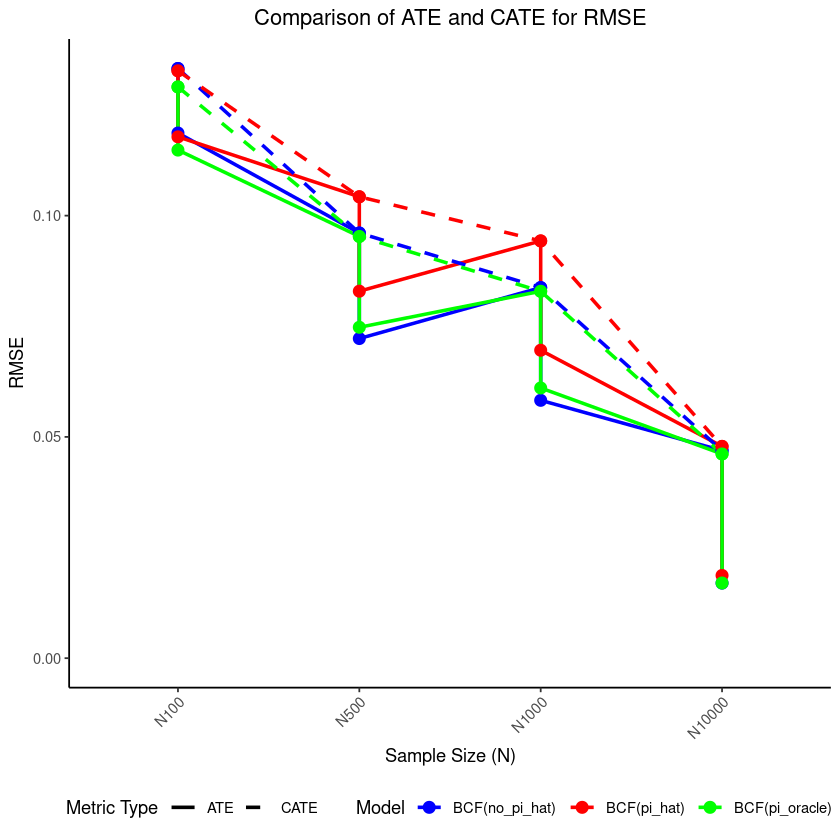

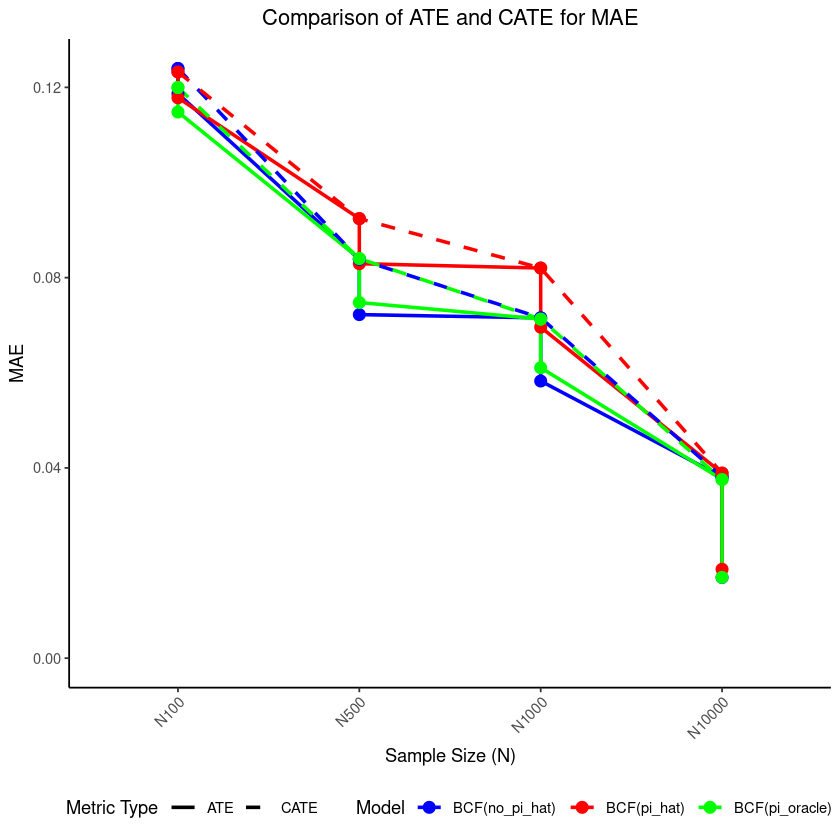

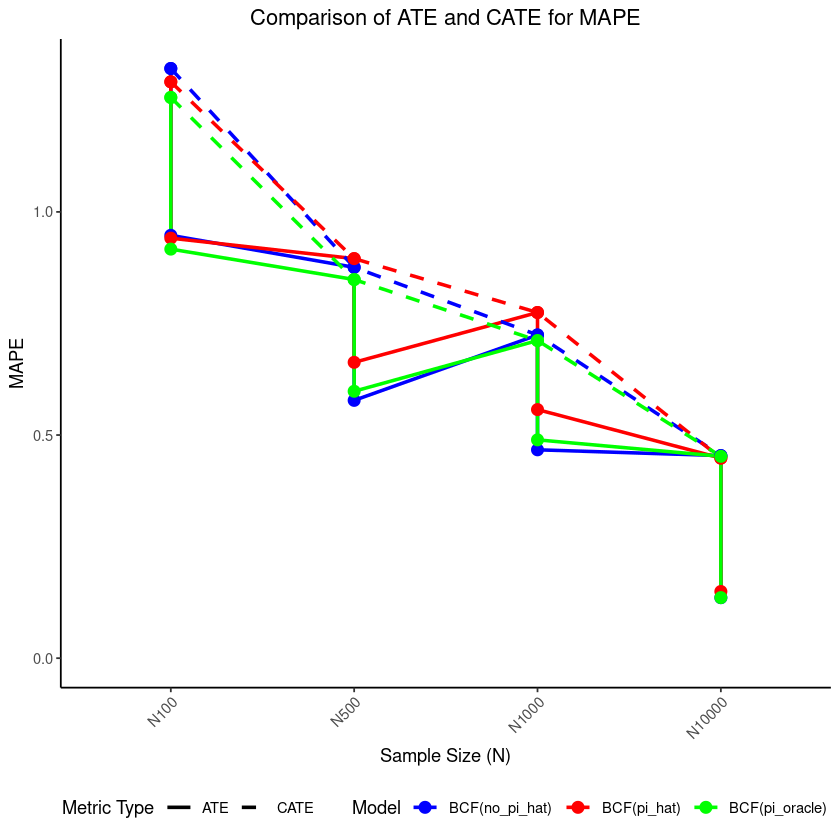

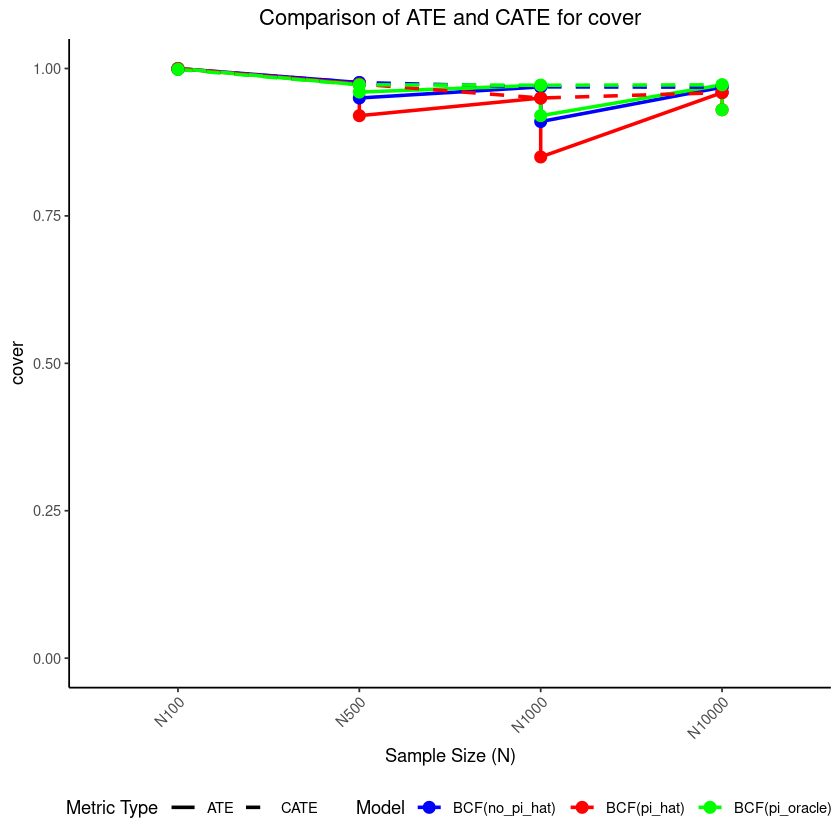

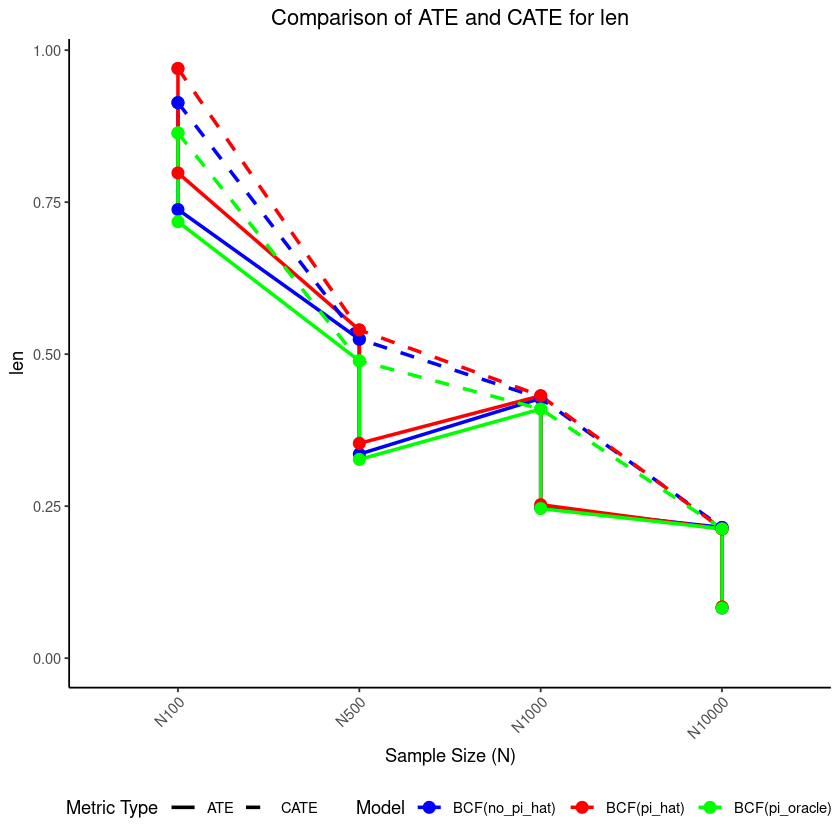

In [27]:
# List of sample sizes
sample_sizes <- c("N100", "N500", "N1000", "N10000")

# List of models
model_names <- c("BCF(no_pi_hat)", "BCF(pi_hat)", "BCF(pi_oracle)")

metrics_for_line_plots <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE","CATE_cover", "CATE_len",
                             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_cover", "ATE_len")

# List of all metrics
all_metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len", "ATE_cover","pi_RMSE", "pi_MAE")

# Function to read data and calculate summary statistics for a given sample size
read_and_summarize <- function(sample_size) {
  file_names <- c(
    paste0("BCF(no_pi_hat)_", sample_size, ".xlsx"),
    paste0("BCF(pi_hat)_", sample_size, ".xlsx"),
    paste0("BCF(pi_oracle)_", sample_size, ".xlsx")
  )

  # Read the data using map_dfr
  data_list <- purrr::map2(file_names, model_names, ~{
    read_excel(.x) %>%
      summarise(across(all_of(all_metrics), mean)) %>%
      pivot_longer(cols = all_of(all_metrics), names_to = "metric", values_to = "mean") %>%
      mutate(model = .y, sample_size = sample_size) # Add model and sample size information
  })

  # Combine all data frames
  combined_data <- bind_rows(data_list)
  return(combined_data)
}

# Read and summarize data for all sample sizes
all_data <- purrr::map_dfr(sample_sizes, read_and_summarize)

# Create line plots, combining ATE and CATE
line_plots <- list()
ate_cate_metrics <- c("RMSE", "MAE", "MAPE", "cover", "len") # Metrics to combine ATE and CATE

for (metric_base in ate_cate_metrics) {
  # Filter data for the current metric (ATE and CATE)
  data_subset_ate <- all_data %>%
    filter(str_detect(metric, paste0("ATE_", metric_base))) %>%
    mutate(metric_type = "ATE")
  data_subset_cate <- all_data %>%
    filter(str_detect(metric, paste0("CATE_", metric_base))) %>%
    mutate(metric_type = "CATE")

  # Combine ATE and CATE data
  data_combined <- bind_rows(data_subset_ate, data_subset_cate)

  # Create the line plot
  line_plots[[metric_base]] <- ggplot(data_combined, aes(x = factor(sample_size, levels = sample_sizes), y = mean, color = model, group = interaction(model, metric_type), linetype = metric_type)) + #corrected x axis
    geom_line(linewidth = 1) +
    geom_point(size = 3) +
    labs(
      title = paste("Comparison of ATE and CATE for", metric_base),
      x = "Sample Size (N)",
      y = metric_base,
      color = "Model",
      linetype = "Metric Type"
    ) +
    scale_color_manual(values = c("BCF(no_pi_hat)" = "blue", "BCF(pi_hat)" = "red", "BCF(pi_oracle)" = "green")) +
    scale_linetype_manual(values = c("ATE" = "solid", "CATE" = "dashed")) +
    theme_classic() +
    theme(
      plot.title = element_text(hjust = 0.5),
      axis.text.x = element_text(angle = 45, hjust = 1),
      legend.position = "bottom"
    )+
    scale_y_continuous(limits = c(0, NA))

  # Save the plot
  ggsave(
    filename = paste0("ate_cate_comparison_", metric_base, ".png"),
    plot = line_plots[[metric_base]],
    width = 10,
    height = 6,
    units = "in"
  )
}

# Display the line plots
for (metric_base in ate_cate_metrics) {
  print(line_plots[[metric_base]])
}


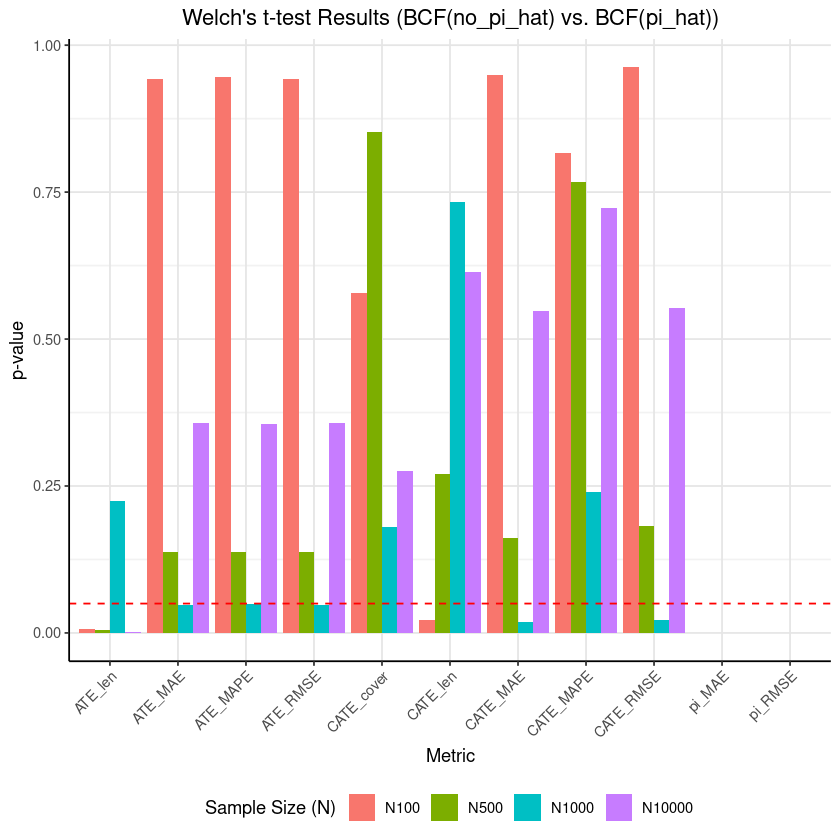

In [29]:

# List of all metrics
all_metrics <- c("CATE_RMSE", "CATE_MAE", "CATE_MAPE", "CATE_cover", "CATE_len",
             "ATE_RMSE", "ATE_MAE", "ATE_MAPE", "ATE_len","pi_RMSE", "pi_MAE")

t_test_results <- list()
for (sample_size in sample_sizes) {
  file_no_pi_hat <- paste0("BCF(no_pi_hat)_", sample_size, ".xlsx")
  file_pi_hat <- paste0("BCF(pi_hat)_", sample_size, ".xlsx")

  df_no_pi_hat <- read_excel(file_no_pi_hat)
  df_pi_hat <- read_excel(file_pi_hat)

  t_test_results[[sample_size]] <- data.frame(metric = all_metrics) # Store results with the metric name
  for (metric in all_metrics) {
    test_result <- t.test(df_no_pi_hat[[metric]], df_pi_hat[[metric]], var.equal = FALSE)
    t_test_results[[sample_size]][t_test_results[[sample_size]]$metric == metric, "t_statistic"] <- test_result$statistic
    t_test_results[[sample_size]][t_test_results[[sample_size]]$metric == metric, "p_value"] <- test_result$p.value
  }
  t_test_results[[sample_size]]$sample_size_n = sample_size #add sample size
}

# Combine t-test results for plotting
t_test_df <- bind_rows(t_test_results, .id = "sample_size")
t_test_df$sample_size_n <- factor(t_test_df$sample_size_n, levels = sample_sizes) #order


# Bar plot for p-values
bar_plot_p_val <- ggplot(t_test_df, aes(x = metric, y = p_value, fill = sample_size_n)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Welch's t-test Results (BCF(no_pi_hat) vs. BCF(pi_hat))",
    x = "Metric",
    y = "p-value",
    fill = "Sample Size (N)"
  ) +
  theme_classic() + # Changed theme here
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom",
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey95")
  ) +
  geom_hline(yintercept = 0.05, color = "red", linetype = "dashed") +
  scale_y_continuous(limits = c(0, NA)) # Set y-axis minimum to 0

# Save the plot
  ggsave(
    filename = "t_test_results_p_value.png",
    plot = bar_plot_p_val,
    width = 10,
    height = 6,
    units = "in"
  )
print(bar_plot_p_val)